Введение 

В ходе выполнения задачи я хотел найти подозрительные данные, которые позволили бы объяснить сбой 2024-10-08. Однако проведенный анализ не позволил выявить отличительных данных, которые бы позволили объяснить сбой

В ходе выполнения задачи я 

1. Выгрузил количество ошибок для трех cn по часам за период с седьмого по тринацатое октября 
2. Выгрузил количество запросов для трех cn по часам за период с седьмого по тринацатое октября
3. Выгрузил количество запросов для трех cn по сайтам по часам за период с седьмого по тринацатое октября
4. Выгрузил количество мегабайт для трех cn по сайтам по часам за период с седьмого по тринацатое октября
5. Выгрузил количество ошибок по сайтам для трех cn по часам за период с седьмого по тринацатое октября 
6. Выгрузил количество ошибок по сайтам для трех cn по дням за период с седьмого по тринацатое октября 
7. Построил график, отражающий объем трафика (Mb) за день
8. Суммарный Mb посуточный  за период с седьмого по тринацатое октября
9. График, отражающий количество запросов по cn по часам и суткам за период с седьмого по тринацатое октября 
10. График, отражающий количество ошибок для каждого cn  по часам и суткам за период с седьмого по тринацатое октября 
11. Графики, отражающие распределение сайтов в процентов для каждого cn по суткам  за период с седьмого по тринацатое октября 
12. Графики, отражаюшие количество посещений сайтов с ошибками по часам  для каждого cn по суткам  за период с седьмого по тринацатое октября

Выгрузка данных

Количество ошибок для трех cn по часам за период с седьмого по тринацатое октября 

In [1]:
import os
from clickhouse_driver import Client
import pandas as pd

# Получаем пароль из переменной окружения
password = os.getenv("CLICKHOUSE_PASSWORD")

# Проверяем, что пароль не является None
if password is None:
    raise ValueError("Переменная окружения CLICKHOUSE_PASSWORD не установлена")

client = Client(
    host='ch.infra.zprx.net',
    port=2044,
    user='zprx_analytics',
    password=password,
    secure=True,
    verify=False,
    database='zprx'
)
try:
    query = """
    SELECT 
    cn,
    countIf(error > 0) AS cnt_error,
    toStartOfHour(ts_millis) AS hour
    FROM zprx.zproxy_reqs_v1__merge
    WHERE toDate(ts_millis) >= '2024-10-07'
    AND toDate(ts_millis) <= '2024-10-13'
    AND cn IN ('3c2d2pwxMv','s1656kIF0R','0EyvR7vRcj')
    GROUP BY cn, hour
    """

    # Execute the query and store the result in DataFrame
    result = client.execute(query)
    error_count = pd.DataFrame(result, columns=["cn","cnt_error","hour"])

    # Print the results in table format
    print(error_count)

finally:
    client.disconnect()

             cn  cnt_error                      hour
0    s1656kIF0R         99 2024-10-08 18:00:00+00:00
1    3c2d2pwxMv          6 2024-10-08 11:00:00+00:00
2    s1656kIF0R          3 2024-10-13 18:00:00+00:00
3    s1656kIF0R          0 2024-10-11 08:00:00+00:00
4    0EyvR7vRcj          0 2024-10-13 09:00:00+00:00
..          ...        ...                       ...
360  s1656kIF0R          0 2024-10-11 06:00:00+00:00
361  0EyvR7vRcj         95 2024-10-07 05:00:00+00:00
362  3c2d2pwxMv          0 2024-10-08 07:00:00+00:00
363  3c2d2pwxMv        365 2024-10-11 02:00:00+00:00
364  s1656kIF0R        104 2024-10-07 19:00:00+00:00

[365 rows x 3 columns]


Количество запросов для трех cn по часам за период с седьмого по тринацатое октября

In [2]:
import os
from clickhouse_driver import Client
import pandas as pd

# Получаем пароль из переменной окружения
password = os.getenv("CLICKHOUSE_PASSWORD")

# Проверяем, что пароль не является None
if password is None:
    raise ValueError("Переменная окружения CLICKHOUSE_PASSWORD не установлена")

client = Client(
    host='ch.infra.zprx.net',
    port=2044,
    user='zprx_analytics',
    password=password,
    secure=True,
    verify=False,
    database='zprx'
)
try:
    query = """
    SELECT 
    cn,
    COUNT(*) AS cnt,
    toStartOfHour(ts_millis) AS hour
    FROM zprx.zproxy_reqs_v1__merge
    WHERE toDate(ts_millis) >= '2024-10-07'
    AND toDate(ts_millis) <= '2024-10-13'
    AND cn IN ('3c2d2pwxMv','s1656kIF0R','0EyvR7vRcj')
    GROUP BY cn, hour
    """

    # Execute the query and store the result in DataFrame
    result = client.execute(query)
    count_by_day = pd.DataFrame(result, columns=["cn","cnt","hour"])

    # Print the results in table format
    print(count_by_day)

finally:
    client.disconnect()

             cn   cnt                      hour
0    s1656kIF0R  4871 2024-10-08 18:00:00+00:00
1    3c2d2pwxMv   727 2024-10-08 11:00:00+00:00
2    s1656kIF0R   906 2024-10-13 18:00:00+00:00
3    s1656kIF0R    71 2024-10-11 08:00:00+00:00
4    0EyvR7vRcj    70 2024-10-13 09:00:00+00:00
..          ...   ...                       ...
360  s1656kIF0R   122 2024-10-11 06:00:00+00:00
361  0EyvR7vRcj   677 2024-10-07 05:00:00+00:00
362  3c2d2pwxMv    70 2024-10-08 07:00:00+00:00
363  3c2d2pwxMv  1823 2024-10-11 02:00:00+00:00
364  s1656kIF0R  2612 2024-10-07 19:00:00+00:00

[365 rows x 3 columns]


Количество запросов для трех cn по сайтам по часам за период с седьмого по тринацатое октября

In [3]:
import os
from clickhouse_driver import Client
import pandas as pd

# Получаем пароль из переменной окружения
password = os.getenv("CLICKHOUSE_PASSWORD")

# Проверяем, что пароль не является None
if password is None:
    raise ValueError("Переменная окружения CLICKHOUSE_PASSWORD не установлена")

client = Client(
    host='ch.infra.zprx.net',
    port=2044,
    user='zprx_analytics',
    password=password,
    secure=True,
    verify=False,
    database='zprx'
)
try:
    query = """
    SELECT 
    cn,
    req_host,
    toDate(ts_millis) AS day,
    COUNT(*) AS requests_count
    FROM 
    zprx.zproxy_reqs_v1__merge
    WHERE 
    cn IN ('3c2d2pwxMv', 's1656kIF0R', '0EyvR7vRcj') 
    AND ts_millis >= toDateTime('2024-10-07 00:00:00') 
    AND ts_millis < toDateTime('2024-10-14 00:00:00')
    GROUP BY 
    day, cn, req_host
    ORDER BY 
    day, cn, requests_count DESC;
    """

    # Execute the query and store the result in DataFrame
    result = client.execute(query)
    hosts_by_day = pd.DataFrame(result, columns=["cn","req_host","day", "requests_count"])

    # Print the results in table format
    print(hosts_by_day)

finally:
    client.disconnect()

              cn                      req_host         day  requests_count
0     0EyvR7vRcj      indigo.multiloginapp.com  2024-10-07            1703
1     0EyvR7vRcj              www.facebook.com  2024-10-07            1157
2     0EyvR7vRcj  scontent-sjc3-1.xx.fbcdn.net  2024-10-07             907
3     0EyvR7vRcj           static.xx.fbcdn.net  2024-10-07             682
4     0EyvR7vRcj       adsmanager.facebook.com  2024-10-07             565
...          ...                           ...         ...             ...
5304  s1656kIF0R           cmr.bidderstack.com  2024-10-13               1
5305  s1656kIF0R         analytics.twitter.com  2024-10-13               1
5306  s1656kIF0R                 px.adhigh.net  2024-10-13               1
5307  s1656kIF0R                dpm.demdex.net  2024-10-13               1
5308  s1656kIF0R          euw-ice.360yield.com  2024-10-13               1

[5309 rows x 4 columns]


Количество мегабайт для трех cn по сайтам по часам за период с седьмого по тринацатое октября

In [4]:
import os
from clickhouse_driver import Client
import pandas as pd

# Получаем пароль из переменной окружения
password = os.getenv("CLICKHOUSE_PASSWORD")

# Проверяем, что пароль не является None
if password is None:
    raise ValueError("Переменная окружения CLICKHOUSE_PASSWORD не установлена")

client = Client(
    host='ch.infra.zprx.net',
    port=2044,
    user='zprx_analytics',
    password=password,
    secure=True,
    verify=False,
    database='zprx'
)
try:
    query = """
    SELECT 
    cn,
    floor(sum(tx_bytes + rx_bytes) / (1024 * 1024), 1) AS Mb,
    toStartOfHour(ts_millis) AS hour
    FROM zprx.zproxy_reqs_v1__merge
    WHERE cn IN ('3c2d2pwxMv', 's1656kIF0R', '0EyvR7vRcj')
    AND toDate(ts_millis) >= '2024-10-07'
    AND toDate(ts_millis) <= '2024-10-13'
    GROUP BY cn, hour
    """

    # Execute the query and store the result in DataFrame
    result = client.execute(query)
    mb_count = pd.DataFrame(result, columns=["cn","Mb","hour"])

    # Print the results in table format
    print(mb_count)

finally:
    client.disconnect()

             cn     Mb                      hour
0    s1656kIF0R  439.5 2024-10-08 18:00:00+00:00
1    3c2d2pwxMv    3.4 2024-10-08 11:00:00+00:00
2    s1656kIF0R  123.3 2024-10-13 18:00:00+00:00
3    s1656kIF0R    0.4 2024-10-11 08:00:00+00:00
4    0EyvR7vRcj    0.5 2024-10-13 09:00:00+00:00
..          ...    ...                       ...
360  s1656kIF0R    0.7 2024-10-11 06:00:00+00:00
361  0EyvR7vRcj  290.2 2024-10-07 05:00:00+00:00
362  3c2d2pwxMv    0.4 2024-10-08 07:00:00+00:00
363  3c2d2pwxMv  264.6 2024-10-11 02:00:00+00:00
364  s1656kIF0R  540.0 2024-10-07 19:00:00+00:00

[365 rows x 3 columns]


Количество ошибок по сайтам для трех cn по часам за период с седьмого по тринацатое октября 

In [5]:
import os
from clickhouse_driver import Client
import pandas as pd

# Получаем пароль из переменной окружения
password = os.getenv("CLICKHOUSE_PASSWORD")

# Проверяем, что пароль не является None
if password is None:
    raise ValueError("Переменная окружения CLICKHOUSE_PASSWORD не установлена")

client = Client(
    host='ch.infra.zprx.net',
    port=2044,
    user='zprx_analytics',
    password=password,
    secure=True,
    verify=False,
    database='zprx'
)
try:
    query = """
    SELECT 
    cn,
    req_host,
    countIf(error > 0) error_counts,
    toStartOfHour(ts_millis) AS hour
    FROM zprx.zproxy_reqs_v1__merge
    WHERE toDate(ts_millis) >= '2024-10-07'
    AND toDate(ts_millis) <= '2024-10-13'
    AND cn IN ('3c2d2pwxMv','s1656kIF0R','0EyvR7vRcj')
    GROUP BY cn, req_host, hour
    """

    # Execute the query and store the result in DataFrame
    result = client.execute(query)
    error_per_host = pd.DataFrame(result, columns=["cn","req_host","error_counts","hour"])

    # Print the results in table format
    print(error_per_host)

finally:
    client.disconnect()

               cn                               req_host  error_counts  \
0      s1656kIF0R  phishing-detection.api.cx.metamask.io             0   
1      s1656kIF0R                      errors.stripe.com             1   
2      s1656kIF0R                     td.doubleclick.net             0   
3      s1656kIF0R                   gateway.facebook.com             0   
4      s1656kIF0R                   consent.cmp.oath.com             0   
...           ...                                    ...           ...   
16762  s1656kIF0R                           cti.w55c.net             0   
16763  s1656kIF0R            secure.insightexpressai.com             0   
16764  s1656kIF0R                    accounts.google.com             3   
16765  s1656kIF0R               ssum-sec.casalemedia.com             0   
16766  s1656kIF0R                         s.c.appier.net             0   

                           hour  
0     2024-10-08 09:00:00+00:00  
1     2024-10-08 07:00:00+00:00  
2     202

Количество ошибок по сайтам для трех cn по дням за период с седьмого по тринацатое октября

In [6]:
import os
from clickhouse_driver import Client
import pandas as pd

# Получаем пароль из переменной окружения
password = os.getenv("CLICKHOUSE_PASSWORD")

# Проверяем, что пароль не является None
if password is None:
    raise ValueError("Переменная окружения CLICKHOUSE_PASSWORD не установлена")

client = Client(
    host='ch.infra.zprx.net',
    port=2044,
    user='zprx_analytics',
    password=password,
    secure=True,
    verify=False,
    database='zprx'
)
try:
    query = """
    SELECT
        toDate(ts_millis) AS dt,
        cn,
        req_host,
        countIf(error > 0) AS error_counts
    FROM zprx.zproxy_reqs_v1__merge
    WHERE toDate(ts_millis) >= '2024-10-07'
      AND toDate(ts_millis) <= '2024-10-13'
      AND cn IN ('3c2d2pwxMv','s1656kIF0R','0EyvR7vRcj')
    GROUP BY
        dt,
        cn,
        req_host
    """

    # Execute the query and store the result in DataFrame
    result = client.execute(query)
    error_per_percent = pd.DataFrame(result, columns=["dt","cn","req_host","error_counts"])

    # Print the results in table format
    print(error_per_percent)

finally:
    client.disconnect()

              dt          cn                           req_host  error_counts
0     2024-10-09  s1656kIF0R              prg.smartadserver.com             0
1     2024-10-08  s1656kIF0R     securepubads.g.doubleclick.net             6
2     2024-10-07  s1656kIF0R                      z.moatads.com             0
3     2024-10-07  s1656kIF0R                         s2s.t13.io             0
4     2024-10-09  s1656kIF0R                       zelenka.guru             0
...          ...         ...                                ...           ...
5304  2024-10-08  s1656kIF0R       beacon.lynx.cognitivlabs.com             0
5305  2024-10-07  s1656kIF0R                     gum.criteo.com             0
5306  2024-10-09  s1656kIF0R              secure.quantserve.com             0
5307  2024-10-09  s1656kIF0R  rr5---sn-o097znzd.googlevideo.com             0
5308  2024-10-08  s1656kIF0R         rtb-useast.creativedot.net             0

[5309 rows x 4 columns]


Визуализация данных

График, отражающий объем трафика (Mb) за день

C:\Users\user\AppData\Local\Temp\ipykernel_14752\3651708757.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mb_filtered['hour_only'] = mb_filtered['hour'].dt.hour


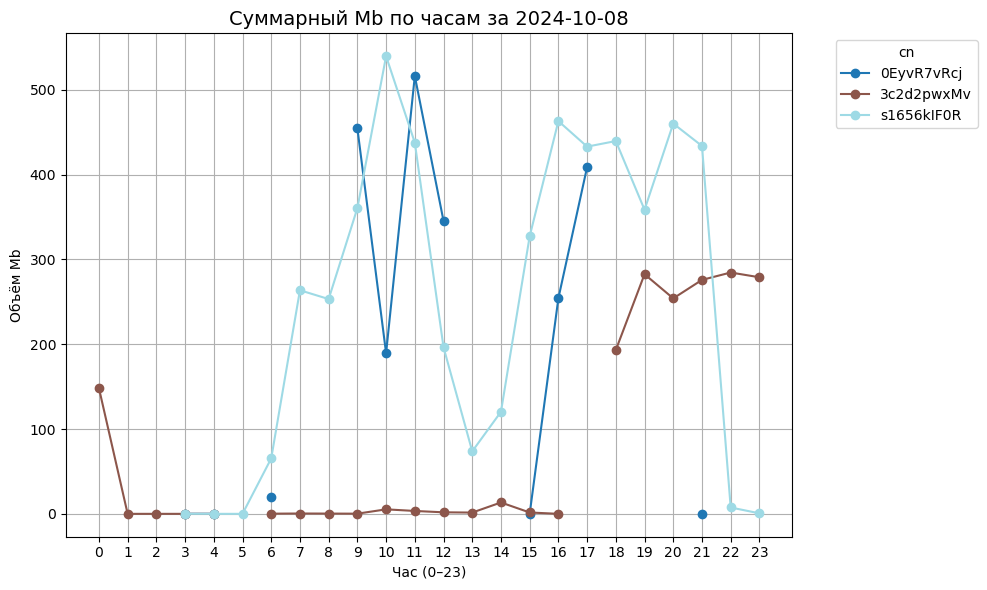

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Предполагается, что DataFrame mb_count уже существует и содержит:
# столбцы 'cn', 'Mb', 'hour' (где 'hour' — это datetime либо уже преобразуется к нему).

# Преобразуем столбец 'hour' в тип datetime (на случай, если это не сделано)
mb_count['hour'] = pd.to_datetime(mb_count['hour'])

# Фильтруем данные только за 2024-10-08
target_date = pd.to_datetime("2024-10-08").date()
mb_filtered = mb_count[mb_count['hour'].dt.date == target_date]

# Создаём отдельный столбец с числом часа
mb_filtered['hour_only'] = mb_filtered['hour'].dt.hour

# Группируем по комбинации (hour_only, cn) и суммируем 'Mb'
mb_grouped = (
    mb_filtered
    .groupby(['hour_only', 'cn'], as_index=False)['Mb']
    .sum()
)

# Делаем сводную таблицу:
# строки — час (hour_only), столбцы — cn, значения — Mb
pivot_mb = mb_grouped.pivot(index='hour_only', columns='cn', values='Mb')

# Гарантируем, что в индексах будут все 24 часа (0..23)
all_hours = range(24)
pivot_mb = pivot_mb.reindex(all_hours, fill_value=0)

# Строим линейный график: 
#   - 'marker="o"' добавит точки в местах данных, 
#   - 'linestyle="-"' (по умолчанию) соединяет их линиями,
#   - 'grid=True' — чтобы включить сетку
ax = pivot_mb.plot(
    kind='line',
    marker='o',
    figsize=(10, 6),
    colormap='tab20',
    grid=True
)

# Дополнительно укажем метки на оси X для каждого часа
ax.set_xticks(range(24))

plt.title('Суммарный Mb по часам за 2024-10-08', fontsize=14)
plt.xlabel('Час (0–23)')
plt.ylabel('Объём Mb')
plt.legend(title='cn', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




Как видно из графика, в 11 часов UTC( 14 часов по Москве) был всплеск только у cn 0EyvR7vRcj. Остальные cn не продемонстрировали каких-то существенных отклонений. 

 Суммарный Mb посуточный  за период с седьмого по тринацатое октября

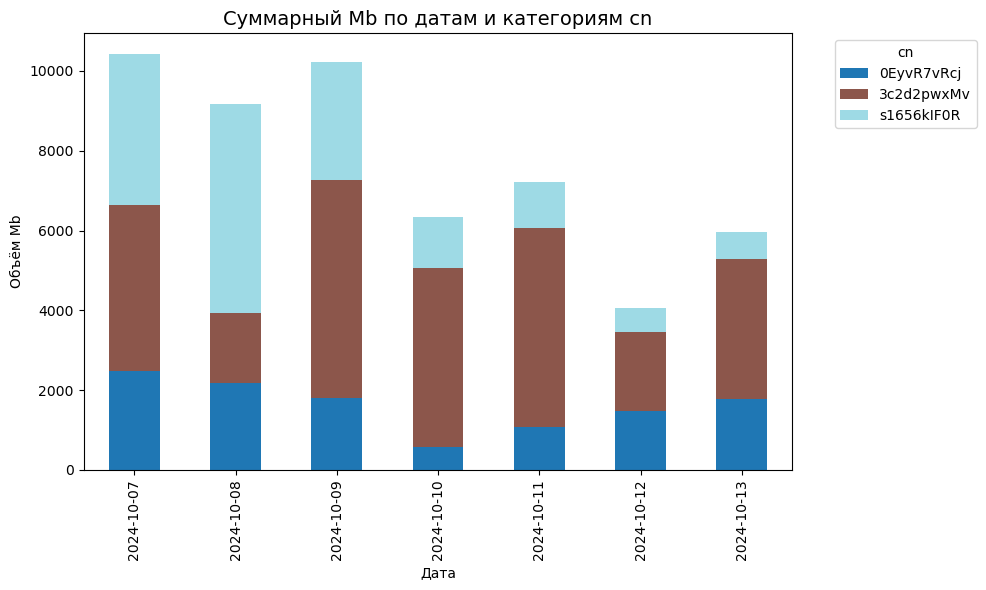

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Предполагаем, что у вас уже есть DataFrame mb_count со столбцами:
# 'cn', 'Mb', 'hour'.
# Ничего дополнительно создавать не нужно.

# Преобразуем столбец hour в тип datetime (если ещё не преобразован)
mb_count['hour'] = pd.to_datetime(mb_count['hour'])

# Создаём столбец с датой (без часов), чтобы группировать по датам
mb_count['date'] = mb_count['hour'].dt.date

# Группируем по комбинации (дата, cn) и суммируем Mb
mb_grouped = mb_count.groupby(['date', 'cn'], as_index=False)['Mb'].sum()

# Создаём сводную таблицу:
# строки — это date, столбцы — это cn, а значения — суммарный Mb
pivot_mb = mb_grouped.pivot(index='date', columns='cn', values='Mb')

# Строим стэковую столбчатую диаграмму
pivot_mb.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='tab20'
)

plt.title('Суммарный Mb по датам и категориям cn', fontsize=14)
plt.xlabel('Дата')
plt.ylabel('Объём Mb')
plt.legend(title='cn', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



Из графика видно, что на фоне других дней 2024-10-08 использование трафика не отличались сильно от других дней, однако после 2024-10-09 также были изменения, однако это мало о чем говорит 

График, отражающий количество запросов по cn по часам и суткам за период с седьмого по тринацатое октября 

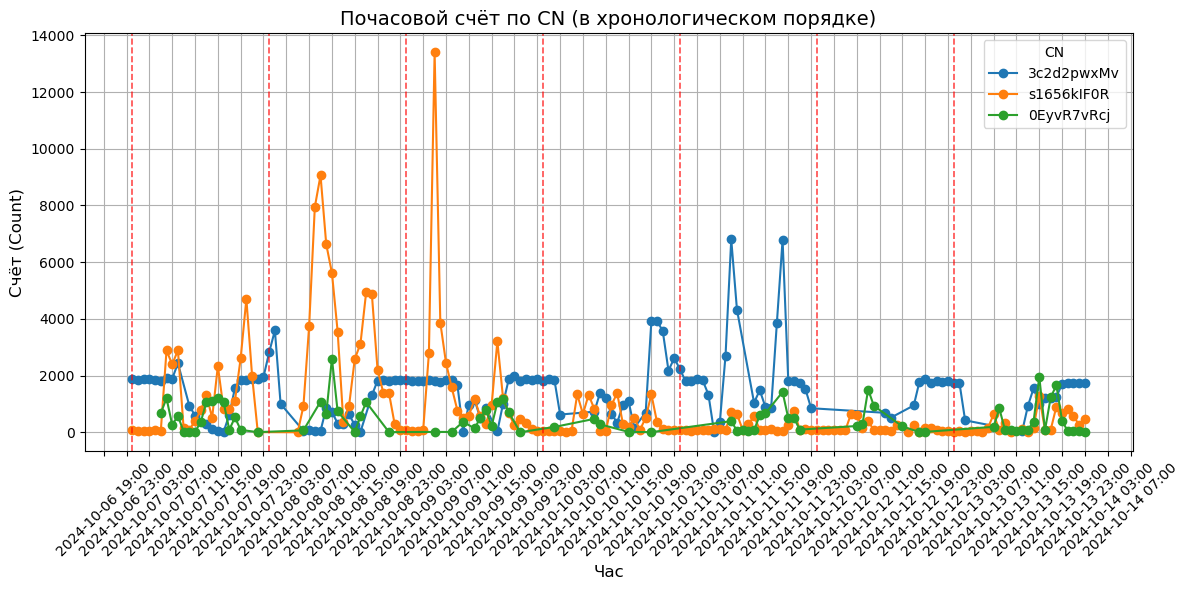

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Предполагаем, что столбец 'hour' уже имеет тип datetime.
# Сортируем данные по столбцу 'hour' (хронологически).
count_by_day_filtered = count_by_day.sort_values(by='hour')

# Создаём фигуру и ось для построения графика.
fig, ax = plt.subplots(figsize=(12, 6))

# Строим линию для каждого уникального значения 'cn'.
for cn in count_by_day_filtered['cn'].unique():
    cn_data = count_by_day_filtered[count_by_day_filtered['cn'] == cn]
    ax.plot(cn_data['hour'], cn_data['cnt'], marker='o', label=cn)

# Устанавливаем заголовок и подписи осей.
ax.set_title('Почасовой счёт по CN (в хронологическом порядке)', fontsize=14)
ax.set_xlabel('Час', fontsize=12)
ax.set_ylabel('Счёт (Count)', fontsize=12)
ax.legend(title='CN', fontsize=10)

# 1) Отображаем метку каждые 4 часа.
ax.xaxis.set_major_locator(mdates.HourLocator(interval=4))
# 2) Формат меток: ГГГГ-мм-дд ЧЧ:ММ
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

# Первая отрисовка всех элементов, чтобы корректно отобразилось нужное количество меток.
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# --- Часть 1. Делаем жирной метку, которая соответствует 00:00:00 ---
tick_locations = ax.xaxis.get_ticklocs()    # Числовые значения положения отметок на оси X
tick_labels = ax.xaxis.get_ticklabels()     # Объекты Text (сами подписи на оси X)

for x_value, label in zip(tick_locations, tick_labels):
    dt_tick = mdates.num2date(x_value)  # Преобразуем числовое значение оси X обратно в datetime
    if dt_tick.hour == 0 and dt_tick.minute == 0 and dt_tick.second == 0:
        label.set_fontweight('bold')

# --- Часть 2. Рисуем вертикальные линии для каждого нового дня ---
# Получаем список всех "целых дней" (полночь) из данных.
unique_days = count_by_day_filtered['hour'].dt.floor('D').unique()
# Для каждой найденной даты (полночь) проводим вертикальную красную пунктирную линию.
for day_start in unique_days:
    ax.axvline(x=day_start, color='red', linestyle='--', linewidth=1.2, alpha=0.7)

plt.show()



График показывает, что во вторник по сравнению с другими днями никаких существенных изменений нет. По крайней мере в 11 часов UTC (14 по МСК) никаких существенных отличий нет

График, отражающий количество ошибок для каждого cn  по часам и суткам за период с седьмого по тринацатое октября

График отражает рост количества ошибок

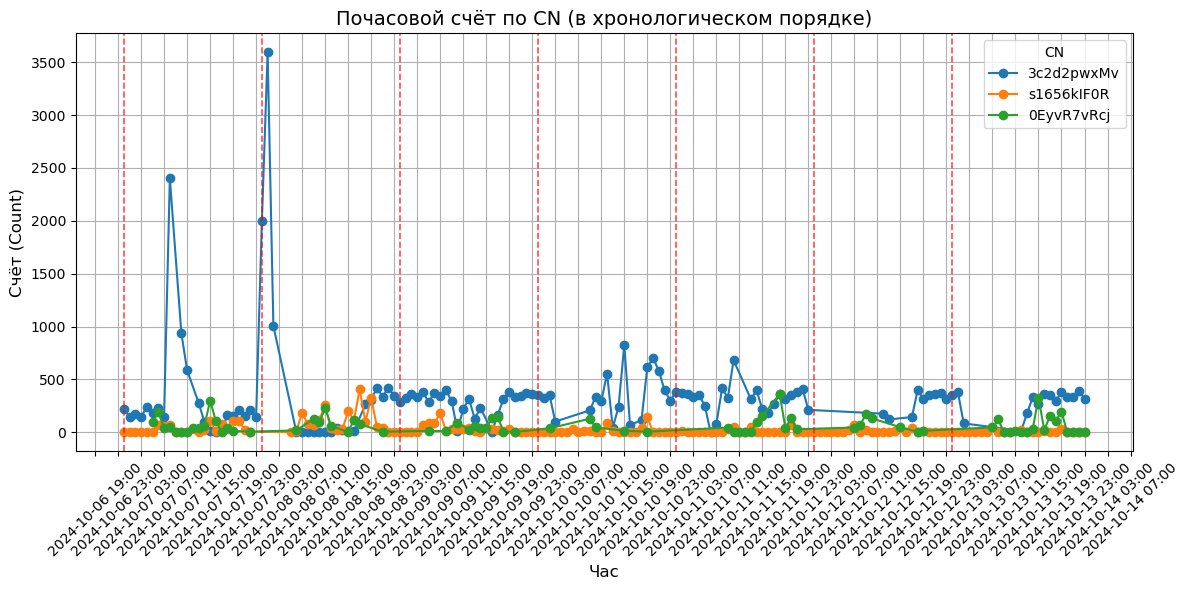

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Предполагаем, что столбец 'hour' уже имеет тип datetime.
# Сортируем данные по столбцу 'hour' (хронологически).
count_by_day_filtered = error_count.sort_values(by='hour')

# Создаём фигуру и ось для построения графика.
fig, ax = plt.subplots(figsize=(12, 6))

# Строим линию для каждого уникального значения 'cn'.
for cn in count_by_day_filtered['cn'].unique():
    cn_data = count_by_day_filtered[count_by_day_filtered['cn'] == cn]
    ax.plot(cn_data['hour'], cn_data['cnt_error'], marker='o', label=cn)

# Устанавливаем заголовок и подписи осей.
ax.set_title('Почасовой счёт по CN (в хронологическом порядке)', fontsize=14)
ax.set_xlabel('Час', fontsize=12)
ax.set_ylabel('Счёт (Count)', fontsize=12)
ax.legend(title='CN', fontsize=10)

# 1) Отображаем метку каждые 4 часа.
ax.xaxis.set_major_locator(mdates.HourLocator(interval=4))
# 2) Формат меток: ГГГГ-мм-дд ЧЧ:ММ
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

# Первая отрисовка всех элементов, чтобы корректно отобразилось нужное количество меток.
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# --- Часть 1. Делаем жирной метку, которая соответствует 00:00:00 ---
tick_locations = ax.xaxis.get_ticklocs()    # Числовые значения положения отметок на оси X
tick_labels = ax.xaxis.get_ticklabels()     # Объекты Text (сами подписи на оси X)

for x_value, label in zip(tick_locations, tick_labels):
    dt_tick = mdates.num2date(x_value)  # Преобразуем числовое значение оси X обратно в datetime
    if dt_tick.hour == 0 and dt_tick.minute == 0 and dt_tick.second == 0:
        label.set_fontweight('bold')

# --- Часть 2. Рисуем вертикальные линии для каждого нового дня ---
# Получаем список всех "целых дней" (полночь) из данных.
unique_days = count_by_day_filtered['hour'].dt.floor('D').unique()
# Для каждой найденной даты (полночь) проводим вертикальную красную пунктирную линию.
for day_start in unique_days:
    ax.axvline(x=day_start, color='red', linestyle='--', linewidth=1.2, alpha=0.7)

plt.show()



На графике видно несколько скачков в количестве ошибок, один из которых приходится на час ночи 8 октября 

Графики, отражающие распределение сайтов в процентов для каждого cn по суткам  за период с седьмого по тринацатое октября 

<Figure size 1200x600 with 0 Axes>

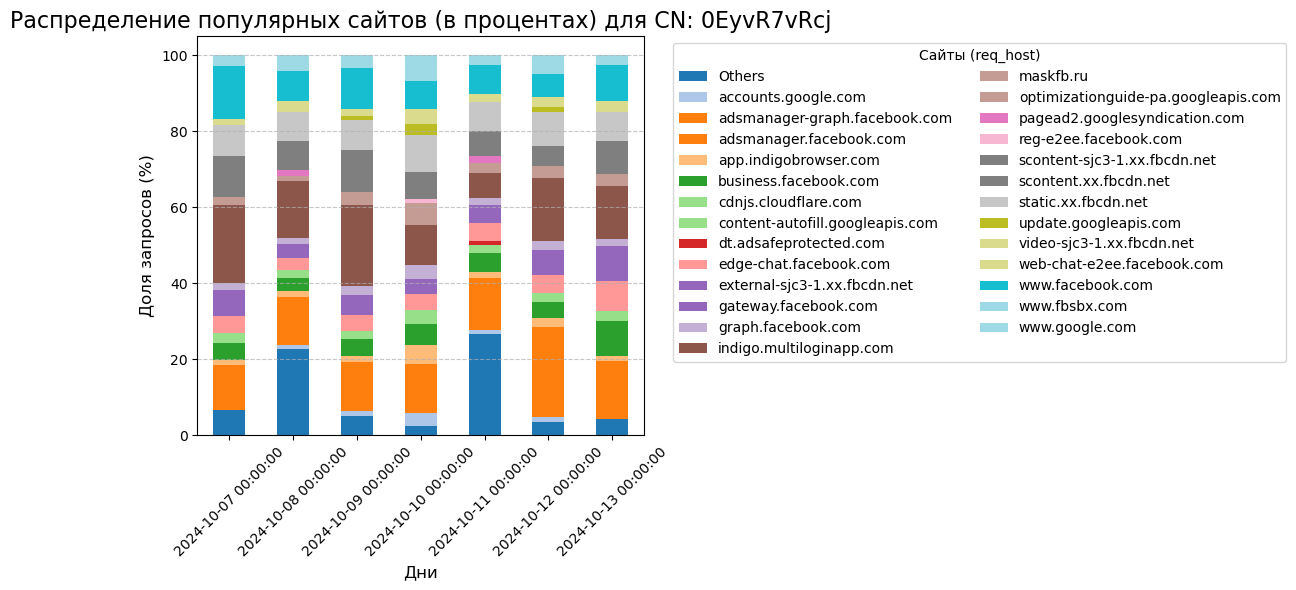

<Figure size 1200x600 with 0 Axes>

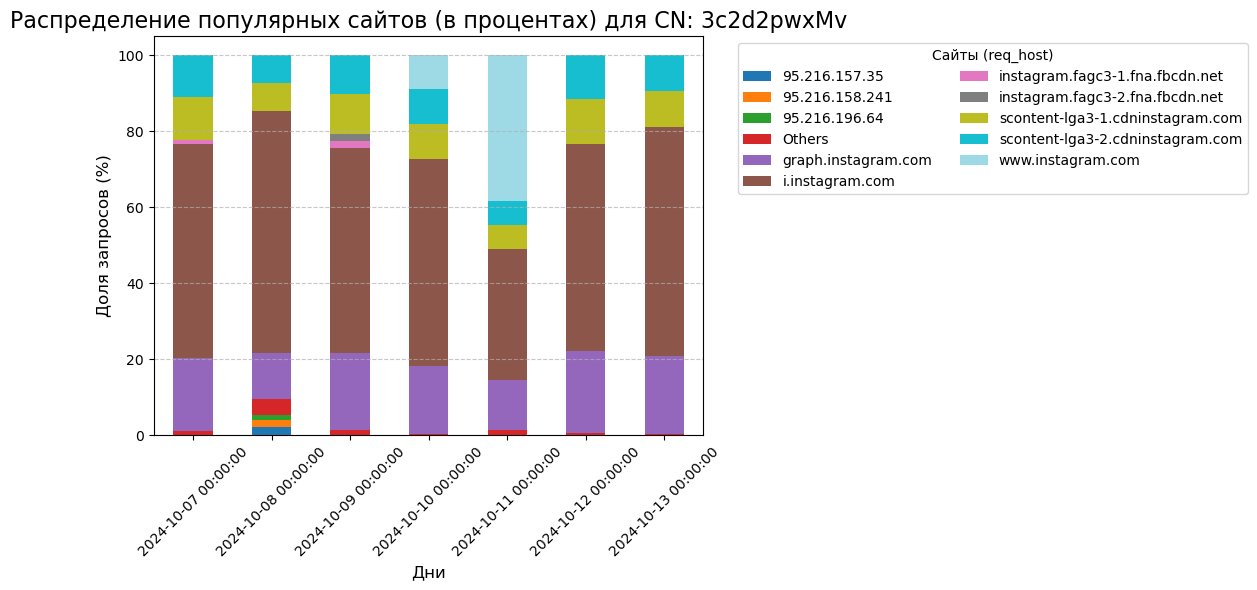

<Figure size 1200x600 with 0 Axes>

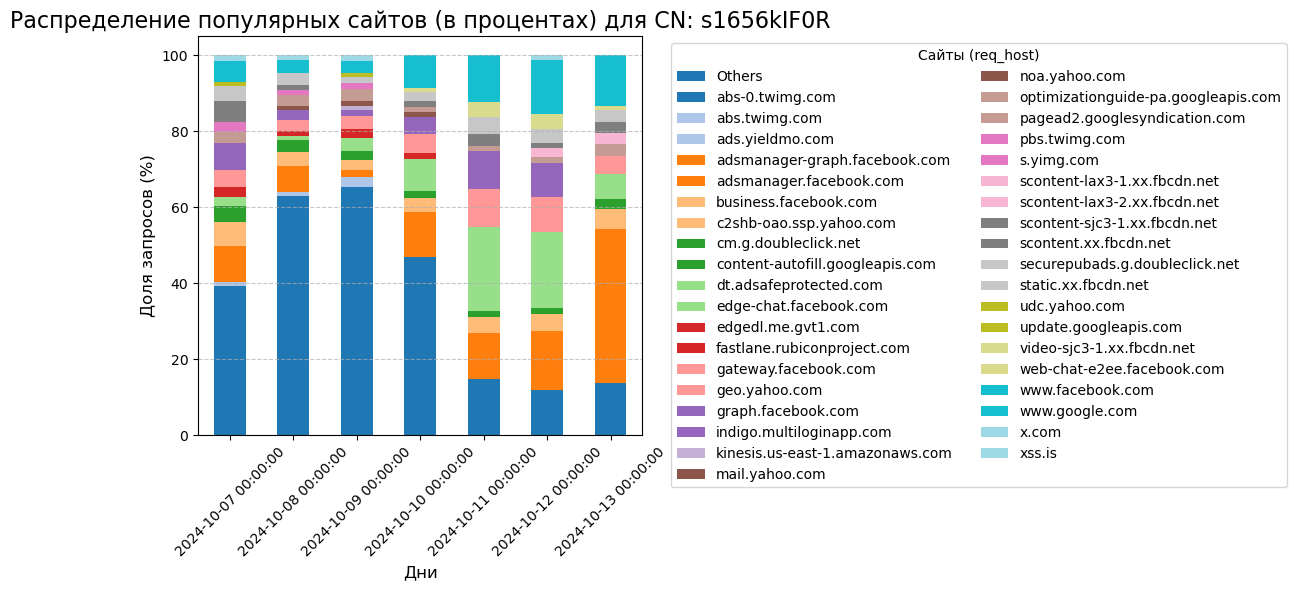

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Преобразование даты в формат datetime, если не сделано
hosts_by_day['day'] = pd.to_datetime(hosts_by_day['day'])

# Список уникальных 'cn'
unique_cns = hosts_by_day['cn'].unique()

# Функция для обработки данных и построения графика
for cn in unique_cns:
    # Фильтрация данных для текущего 'cn'
    cn_data = hosts_by_day[hosts_by_day['cn'] == cn]
    
    # Рассчитываем общую сумму запросов за каждый день
    daily_totals = cn_data.groupby('day')['requests_count'].sum().reset_index()
    daily_totals.rename(columns={'requests_count': 'daily_total'}, inplace=True)
    
    # Объединяем с исходными данными
    cn_data = cn_data.merge(daily_totals, on='day')
    
    # Вычисляем долю запросов для каждого сайта
    cn_data['relative_percent'] = (cn_data['requests_count'] / cn_data['daily_total']) * 100
    
    # Заменяем сайты с долей менее 1% на 'Others' (по исходному примеру)
    cn_data['req_host'] = cn_data['req_host'].where(cn_data['relative_percent'] >= 1, 'Others')
    
    # Пересчитываем данные для графика
    pivot_data = cn_data.groupby(['day', 'req_host'])['relative_percent'].sum().unstack(fill_value=0)
    
    # Построение графика
    plt.figure(figsize=(12, 6))
    pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
    
    # Настройка графика
    plt.title(f'Распределение популярных сайтов (в процентах) для CN: {cn}', fontsize=16)
    plt.xlabel('Дни', fontsize=12)
    plt.ylabel('Доля запросов (%)', fontsize=12)
    
    # Подсчитываем, сколько всего уникальных "столбцов" (сайтов) в данных
    num_sites = len(pivot_data.columns)
    
    # Если сайтов больше 10, делаем легенду в два столбца
    if num_sites > 10:
        plt.legend(title='Сайты (req_host)', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, ncol=2)
    else:
        plt.legend(title='Сайты (req_host)', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, ncol=1)
    
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


Как видно, все cn посещали пропорционально одни и те же сайты в течение недели 

Графики, отражаюшие количество посещений сайтов с ошибками по часам  для каждого cn по суткам  за период с седьмого по тринацатое октября

<Figure size 1200x600 with 0 Axes>

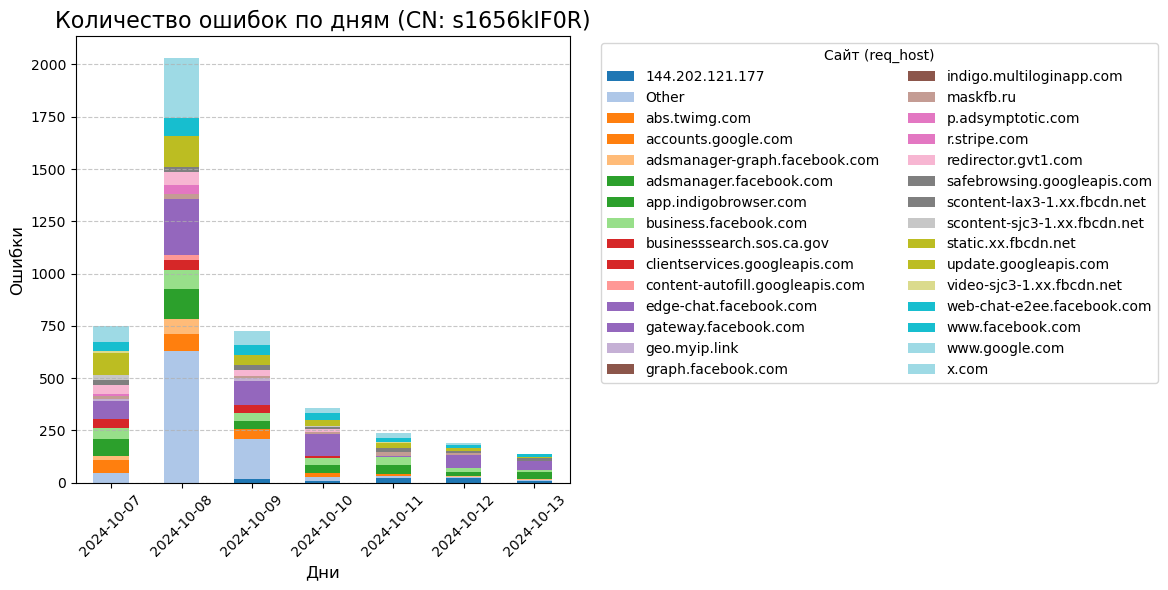

<Figure size 1200x600 with 0 Axes>

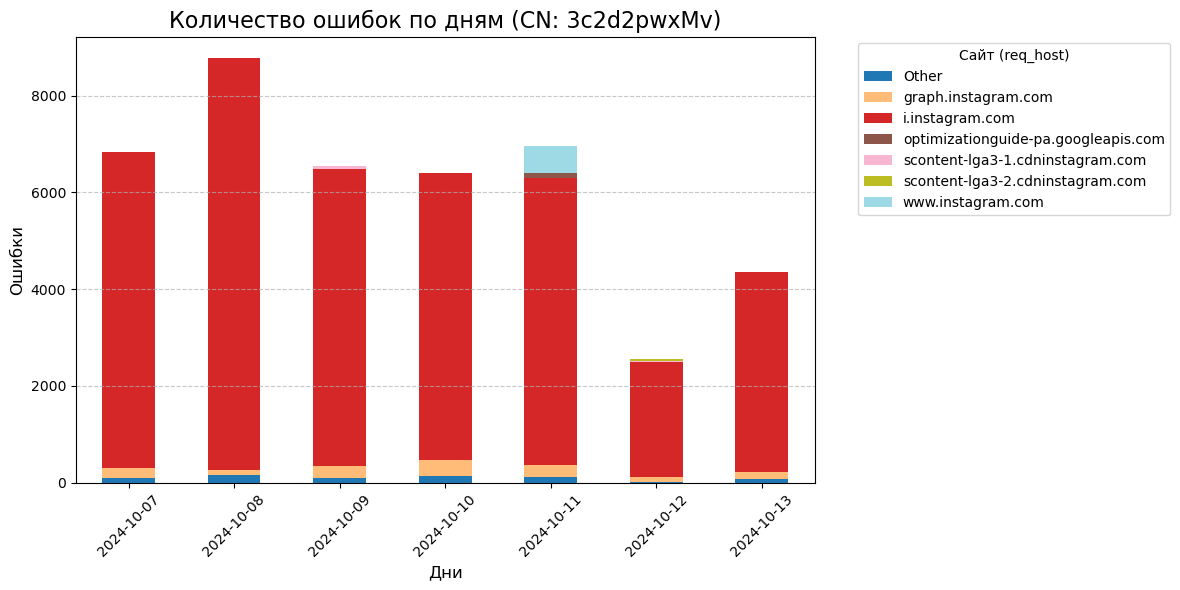

<Figure size 1200x600 with 0 Axes>

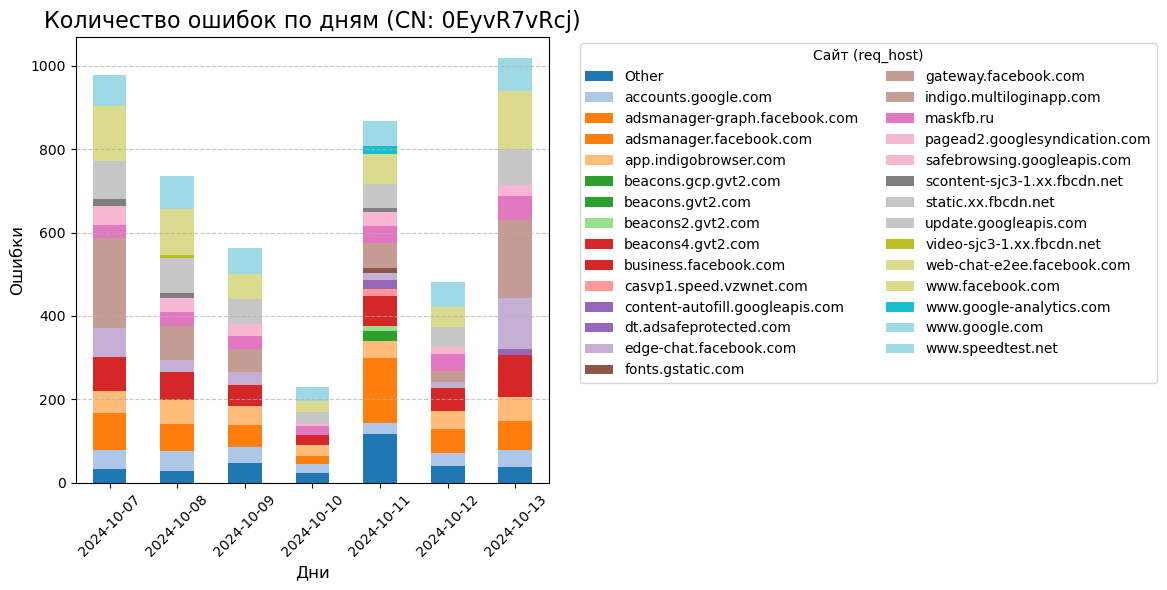

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Преобразование столбца hour в datetime, если это ещё не сделано
error_per_host['hour'] = pd.to_datetime(error_per_host['hour'])

# Добавляем столбец 'day' (дата без учёта времени)
error_per_host['day'] = error_per_host['hour'].dt.date

# Список уникальных 'cn'
unique_cns = error_per_host['cn'].unique()

for cn in unique_cns:
    # Фильтр по текущему 'cn'
    cn_data = error_per_host[error_per_host['cn'] == cn].copy()
    
    # Шаг 1. Суммарное количество ошибок по (день, сайт)
    grouped = cn_data.groupby(['day', 'req_host'])['error_counts'].sum().reset_index()
    
    # Шаг 2. Считаем общее число ошибок за каждый день
    daily_totals = grouped.groupby('day')['error_counts'].sum().reset_index()
    daily_totals.rename(columns={'error_counts': 'daily_total'}, inplace=True)
    
    # Шаг 3. Объединяем, чтобы посчитать процент
    grouped = grouped.merge(daily_totals, on='day', how='left')
    grouped['percent'] = grouped['error_counts'] / grouped['daily_total'] * 100
    
    # Шаг 4. Все сайты, у которых <5% — в категорию "Other"
    grouped['req_host'] = grouped['req_host'].where(grouped['percent'] >= 1, 'Other')
    
    # Шаг 5. Повторно группируем, ведь теперь несколько сайтов могли перейти в "Other"
    grouped = grouped.groupby(['day', 'req_host'])['error_counts'].sum().reset_index()
    
    # Шаг 6. Делаем сводную таблицу
    pivot_data = grouped.pivot(index='day', columns='req_host', values='error_counts').fillna(0)
    
    # Построение графика
    plt.figure(figsize=(12, 6))
    ax = pivot_data.plot(
        kind='bar', 
        stacked=True,   # если хотите столбцы рядом — stacked=False
        figsize=(12, 6),
        colormap='tab20'
    )
    
    # Настройка подписей
    plt.title(f'Количество ошибок по дням (CN: {cn})', fontsize=16)
    plt.xlabel('Дни', fontsize=12)
    plt.ylabel('Ошибки', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Разделяем легенду на 2 колонки, если сайтов много
    num_sites = pivot_data.shape[1]
    if num_sites > 10:
        plt.legend(title='Сайт (req_host)', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
    else:
        plt.legend(title='Сайт (req_host)', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()


Видно, что 8 октября набирается количество ошибок, но не по новым сайтам, а по тем же, на которые заходил cn

In [13]:
import pandas as pd
import numpy as np

# Предположим, что у вас уже есть DataFrame error_per_percent со столбцами:
# 'dt', 'cn', 'req_host', 'error_counts'

# 1. Преобразуем dt в datetime, если это ещё не сделано
error_per_percent['dt'] = pd.to_datetime(error_per_percent['dt'])

# 2. (Опционально) Если в error_per_percent уже агрегированы данные по дням,
#    то шаг группировки не требуется. Если нужно убедиться, что за один (dt, cn, req_host)
#    только одна строка - можно использовать groupby + sum. Иначе пропустите этот шаг.
df_agg = (
    error_per_percent
    .groupby(['dt', 'cn', 'req_host'], as_index=False)['error_counts']
    .sum()
)

# 3. Сортируем по cn, req_host, а затем по dt (чтобы можно было сдвигать значения)
df_agg = df_agg.sort_values(['cn', 'req_host', 'dt'])

# 4. Для каждой группы (cn, req_host) «сдвигаем» error_counts на 1 вперёд (получая предыдущее значение)
df_agg['prev_error_counts'] = df_agg.groupby(['cn', 'req_host'])['error_counts'].shift(1)

# 5. Считаем процент изменения.
#    growth_percent = (error_counts - prev_error_counts) / prev_error_counts * 100
#    Если prev_error_counts = 0 или отсутствует, результат будет NaN/∞.
df_agg['growth_percent'] = (
    (df_agg['error_counts'] - df_agg['prev_error_counts']) 
    / df_agg['prev_error_counts'] * 100
)

# 6. Округляем до 2 знаков после запятой (можно убрать, если не нужно)
df_agg['growth_percent'] = df_agg['growth_percent'].round(2)

# Теперь df_agg содержит столбцы:
# dt, cn, req_host, error_counts, prev_error_counts, growth_percent
df_agg = df_agg[(df_agg['growth_percent'] != np.inf) & (df_agg['growth_percent'] != -np.inf)]

# 7. Выводим результат (или возвращаем df_agg как новую таблицу).
df_agg.sort_values(by = 'growth_percent', ascending = False).query('dt == "2024-10-08"').head(40)


,dt,cn,req_host,error_counts,prev_error_counts,growth_percent
959,2024-10-08,0EyvR7vRcj,video-sjc3-1.xx.fbcdn.net,8,1.0,700.00
2002,2024-10-08,s1656kIF0R,optimizationguide-pa.googleapis.com,8,1.0,700.00
2543,2024-10-08,s1656kIF0R,web-chat-e2ee.facebook.com,23,3.0,666.67
2568,2024-10-08,s1656kIF0R,www.google.com,180,30.0,500.00
1383,2024-10-08,s1656kIF0R,api.x.com,12,2.0,500.00
979,2024-10-08,3c2d2pwxMv,,11,2.0,450.00
2369,2024-10-08,s1656kIF0R,sync.search.spotxchange.com,10,2.0,400.00
1587,2024-10-08,s1656kIF0R,content-autofill.googleapis.com,21,5.0,320.00
1771,2024-10-08,s1656kIF0R,gateway.facebook.com,179,48.0,272.92
1613,2024-10-08,s1656kIF0R,cs.lkqd.net,11,3.0,266.67


Видно, что количество запросов с ошибками в процентах выросло только по тем же сайтам, к которым cn обращался и день назад 

Таким образом, кроме количества ошибок, анализ не показал подозрительных данных, которые могли бы привести к сбою